In [433]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib as plt

#Import cranial database 
df = pd.read_csv('../../../datasources/fdb/cranial.csv')

#Drop categorical data. We'll focus on measurement data.
del df['DB']
del df['Item']
del df['ID']
del df['ContNum']
del df['FDN']
del df['Pop']
del df['PopSex']
del df['Ethnicity'] #Probably really important.
del df['BirthYear']
del df['Age'] #Probably really important.
del df['Comments']

rows, cols = df.shape 
print("Starting with", rows, "individuals and", cols, "features.")


Starting with 5342 individuals and 111 features.


In [453]:
#Consider our target col, Sex.
print("Unique entries.")
df['Sex'].value_counts(dropna=False)

Unique entries.


 1.0    2644
-1.0    1866
Name: Sex, dtype: int64

In [435]:
#Clean N and Nan entries
df = df[~(df.Sex.str.contains("N") == True)]
df = df.dropna(subset = ['Sex'])

df['Sex'].value_counts(dropna=False)

M    3187
F    2095
Name: Sex, dtype: int64

In [436]:
#Note the 3:2 M:F data imbalance. Might need to take care of this later.

In [437]:
#Move from object to float
df['Sex'] = df['Sex'].map({'M':1.0, 'F':-1.0})

In [438]:
if True:
    #Standardize entire dataframe.
    df = df.apply(lambda x: (x - np.mean(x)) / (np.std(x)))
else:
    #Scale to -1 to 1
    df = df.apply(lambda x: )

In [452]:
#Keep labels bipolar.
df['Sex'] = df['Sex'].apply(np.sign)
df.describe()

/usr/local/lib/python3.5/site-packages/numpy/lib/function_base.py:3823: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,Sex,GOL,NOL,BNL,BBH,XCB,XFB,WFB,ZYB,AUB,...,MAN,BABR,BANA,BAPR,UFHT,UFBR,ORBR,BIOB,INTB,MOW
count,4510.000000,4437.000000,3734.000000,4415.000000,4420.000000,4432.000000,3732.000000,2136.000000,4353.000000,4356.000000,...,430.000000,528.000000,499.000000,471.000000,1753.000000,1305.000000,366.000000,500.000000,349.000000,0.0
mean,0.172506,-0.035238,-0.031804,-0.029761,-0.017236,-0.033224,-0.029869,-0.033670,-0.024694,-0.029812,...,0.033769,0.006815,-0.001679,0.012534,-0.035027,-0.047990,-0.038650,-0.065346,0.029068,NaN
std,0.985118,0.950546,0.948874,0.946170,0.949805,0.943970,0.946059,0.947419,0.946101,0.946594,...,0.974181,0.901128,0.940030,0.933153,0.940283,0.941046,0.905695,0.919757,0.754238,NaN
min,-1.000000,-2.873911,-2.997214,-2.800876,-2.705311,-2.726130,-2.741004,-2.806890,-2.796278,-2.788017,...,-2.952512,-2.452880,-2.807367,-2.475570,-2.878751,-2.804610,-2.412618,-2.786893,-2.231535,NaN
25%,-1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,1.000000,2.897108,2.951097,2.924436,2.883447,2.999760,2.971778,2.847711,2.946866,2.978562,...,2.955104,2.485768,2.809456,2.774727,2.999605,2.996963,2.807040,2.216787,2.496257,NaN


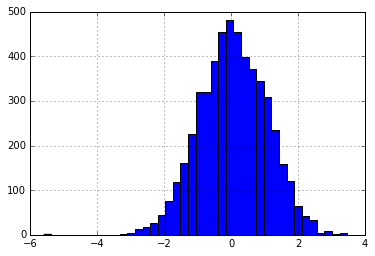

In [440]:
#Take a look at one of the features.
df['GOL'].hist(bins=40)

/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  if __name__ == '__main__':


{'boxes': [<matplotlib.lines.Line2D at 0x12539b4e0>],
 'caps': [<matplotlib.lines.Line2D at 0x1253a1e48>,
 'fliers': [<matplotlib.lines.Line2D at 0x1253a6fd0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1253a67b8>],
 'whiskers': [<matplotlib.lines.Line2D at 0x12539bef0>,
  <matplotlib.lines.Line2D at 0x12539b2b0>]}

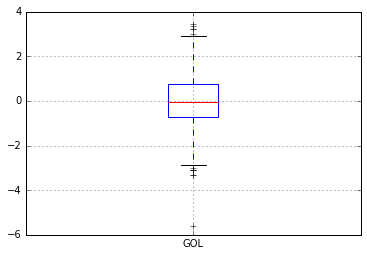

In [441]:
df.boxplot(column='GOL')

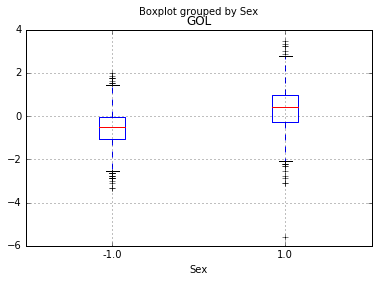

In [442]:
df.boxplot(column='GOL', by = 'Sex')

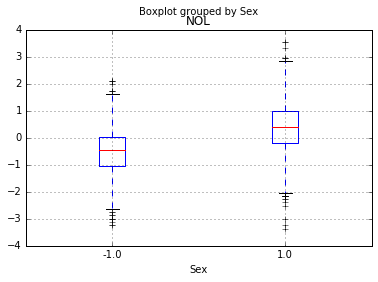

In [443]:
df.boxplot(column='NOL', by = 'Sex')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x125417320>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x12560aac8>], dtype=object)

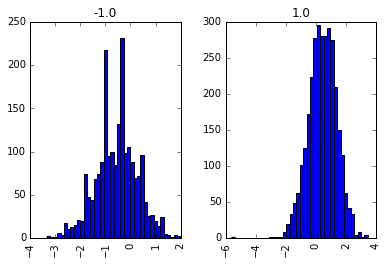

In [444]:
df.hist(column='GOL', by = 'Sex', bins=40)

In [445]:
#Size of dataset
df.shape

(5282, 111)

In [446]:
test = df.groupby(['Sex'])
test.describe()
#Note BBA is + for fem, - for male

/usr/local/lib/python3.5/site-packages/numpy/lib/function_base.py:3823: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


ASB          AUB          AVR          BAA        BABR  \
Sex                                                                          
-1.0 count  1740.000000  2026.000000  1523.000000  1766.000000  215.000000   
     mean     -0.451124    -0.601046    -0.467749    -0.197350   -0.602407   
     std       0.902495     0.870974     0.909167     0.984998    0.817316   
     min      -3.357007    -3.379461    -3.590608    -3.698867   -3.179152   
     25%            NaN          NaN          NaN          NaN         NaN   
     50%            NaN          NaN          NaN          NaN         NaN   
     75%            NaN          NaN          NaN          NaN         NaN   
     max       2.557681     4.900755     6.944379     4.816427    1.614242   
 1.0 count  2657.000000  3080.000000  2099.000000  2646.000000  421.000000   
     mean      0.295429     0.395363     0.339391     0.131716    0.307643   
     std       0.949512     0.874840     0.923413     0.988569    0.945137   
     min      -3.028414    -2.640156    -3.417903    -3.383486   -7.682038   
     25%            NaN          NaN          NaN          NaN         NaN   
     50%            NaN          NaN          NaN          NaN         NaN   
     75%            NaN          NaN          NaN          NaN         NaN   
     max       3.543462     4.161450     4.008399     3.870283    2.776277   

                  BANA        BAPR          BAR          BBA          BBH  \
Sex                                                                         
-1.0 count  202.000000  191.000000  1319.000000  1890.000000  2059.000000   
     mean    -0.517404   -0.430914    -0.235113     0.106259    -0.551343   
     std      0.784136    0.999185     0.932531     0.985547     0.862333   
     min     -2.988555   -3.710934    -2.944543    -2.847265    -3.659489   
     25%           NaN         NaN          NaN          NaN          NaN   
     50%           NaN         NaN          NaN          NaN          NaN   
     75%           NaN         NaN          NaN          NaN          NaN   
     max      2.084705    2.465886     9.967398     4.859514     2.065580   
 1.0 count  405.000000  383.000000  2114.000000  2872.000000  3123.000000   
     mean     0.258063    0.214894     0.146695    -0.069927     0.363502   
     std      0.997972    0.931076     1.013035     1.003620     0.914872   
     min     -2.807367   -2.321150    -3.805339    -2.847265    -2.705311   
     25%           NaN         NaN          NaN          NaN          NaN   
     50%           NaN         NaN          NaN          NaN          NaN   
     75%           NaN         NaN          NaN          NaN          NaN   
     max      5.164898    2.929147     4.228758     4.158897     3.156069   

               ...              WRB          XCB          XFB          XML  \
Sex            ...                                                           
-1.0 count     ...       332.000000  2064.000000  1738.000000  1673.000000   
     mean      ...        -0.376827    -0.399952    -0.430342    -0.540119   
     std       ...         0.897407     0.916151     0.932112     0.877447   
     min       ...        -2.966531    -3.166583    -3.204203    -4.727365   
     25%       ...              NaN          NaN          NaN          NaN   
     50%       ...              NaN          NaN          NaN          NaN   
     75%       ...              NaN          NaN          NaN          NaN   
     max       ...         3.125576     3.440213     2.817378     2.595528   
 1.0 count     ...       544.000000  3132.000000  2657.000000  2554.000000   
     mean      ...         0.229975     0.263570     0.281496     0.353806   
     std       ...         0.991230     0.965175     0.941318     0.913822   
     min       ...        -2.436782    -2.726130    -3.358602    -2.667802   
     25%       ...              NaN          NaN          NaN          NaN   
     50%       ...              NaN          NaN          

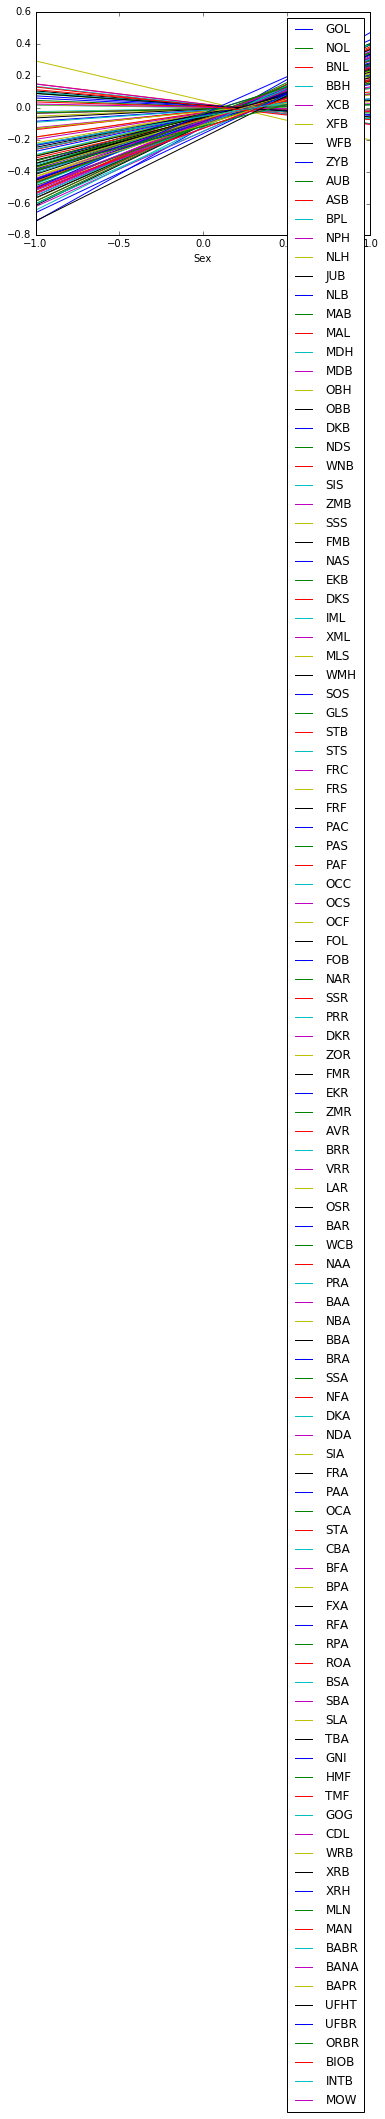

In [447]:
test.mean().plot()

In [448]:
#tmp = df[ (df<= 3).any(axis=1) ]
#tmp = tmp[ (tmp >= -3).any(axis=1)]
#tmp.shape

df.shape

(5282, 111)

In [449]:
df = df[~(df>3).any(axis=1)]
df = df[~(df<-3).any(axis=1)]
df.shape

(4510, 111)

In [450]:
#t = df.shape[1]
#for i in range(t):
#    print(i, df[df.count(axis=1) > i].shape[0])
#df[df.count(axis=1)>0]
df[df.count(axis=1) < 50]

,Sex,GOL,NOL,BNL,BBH,XCB,XFB,WFB,ZYB,AUB,...,MAN,BABR,BANA,BAPR,UFHT,UFBR,ORBR,BIOB,INTB,MOW
28,1.0,1.539221,1.615762,1.015999,1.111402,0.210224,0.810185,0.020411,-0.471672,-0.274380,...,NaN,0.742716,0.816390,0.458419,0.567182,NaN,NaN,1.307027,0.132361,NaN
29,-1.0,-0.610766,NaN,-1.933404,-1.751133,-0.083411,NaN,NaN,-0.745155,NaN,...,NaN,-2.307626,-2.263803,-0.931365,-2.676049,NaN,NaN,NaN,NaN,NaN
30,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.672616,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32,1.0,0.973435,NaN,1.189493,1.247713,0.063406,NaN,NaN,0.075294,NaN,...,NaN,0.887970,0.997578,-0.313683,1.580692,NaN,NaN,NaN,NaN,NaN
35,1.0,NaN,NaN,NaN,1.792957,0.357042,0.192587,0.424311,1.032484,0.908508,...,-1.072816,1.468988,NaN,NaN,NaN,1.132172,NaN,NaN,NaN,NaN
36,1.0,0.973435,NaN,2.056965,1.929269,0.797495,NaN,NaN,0.212035,NaN,...,NaN,1.614242,1.903517,1.230522,-0.446328,NaN,NaN,NaN,NaN,NaN
37,1.0,NaN,NaN,0.495516,NaN,NaN,NaN,NaN,NaN,NaN,...,1.746728,NaN,0.272827,-0.004842,-0.649030,NaN,0.799479,NaN,-1.345074,NaN
38,1.0,0.068177,NaN,0.842505,-0.524332,1.237948,NaN,0.020411,1.579451,2.091396,...,NaN,-1.000337,0.635202,NaN,NaN,1.339371,1.602503,1.761907,0.132361,NaN
39,1.0,0.860278,NaN,-0.198461,0.157223,0.797495,NaN,1.636011,0.485518,0.760647,...,NaN,-0.274065,-0.451925,-1.857888,NaN,1.132172,2.405527,1.761907,-0.163126,NaN
40,1.0,-0.384452,NaN,0.495516,NaN,NaN,NaN,0.424311,-0.061448,-0.274380,...,NaN,NaN,0.272827,NaN,NaN,-0.318222,-0.003545,-0.285053,-0.163126,NaN
